# Sistemas Jerarquicos de N-cuerpos

In [127]:
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from numpy.linalg import norm
%matplotlib inline

# Ecuaciones diferenciales para el sistema de N-cuerpos
def eom(y,t,masas):
    M=len(y);N=M/6
    r=zeros((N,3));v=zeros((N,3))
    drdt=zeros((N,3));dvdt=zeros((N,3))    
    for i in xrange(N):
        r[i]=y[3*i:3*i+3];
        v[i]=y[3*N+3*i:3*N+3*i+3]

    # Derivadas
    for i in xrange(N):
        drdt[i]=v[i]
        for j in xrange(N):
            if i==j:continue
            dvdt[i]+=-masas[j]/norm(r[i]-r[j])**3*(r[i]-r[j])

    # Devuelve derivadas
    dydt=array([])
    for i in xrange(N):dydt=concatenate((dydt,drdt[i]))
    for i in xrange(N):dydt=concatenate((dydt,dvdt[i]))
    return dydt

# Definición de las propiedades del Sistema

In [154]:
# Define el sistema de partículas
sistema=[
    # Particula 0
    dict(
        m=10.0,
        r=[1,0,0],
        v=[0,1,1]
    ),
    # Particula 1
    dict(
        m=1.0,
        r=[1.5,0,0],
        v=[0,-3,1]
    ),
    # Particula 2
    dict(
        m=0.1,
        r=[-1,0,0],
        v=[0,3,1]
    ),
    # Particula 3
    dict(
        m=0.0,
        r=[-1.2,0,0],
        v=[0,3.6,1]
    )
]

# Prepara el Sistema de Partículas
Ntot=len(sistema)
masas=[]
rs=[];vs=[];ys=[]
for i in xrange(Ntot):
    particula=sistema[i]
    if particula['m']>0:
        masas+=[particula['m']]
        rs+=particula['r'];vs+=particula['v']
ys=rs+vs
M=len(ys)
N=M/6
Masa=sum(masas)

# Solución al Problema

In [155]:
Nt=1000
ts=linspace(0,10,Nt)

solucion=odeint(eom,ys,ts,args=(masas,))

rs=zeros((N,Nt,3))
vs=zeros((N,Nt,3))
for i in xrange(N):
    n=3*i
    rs[i]=solucion[:,n:n+3]
    m=3*N+3*i
    vs[i]=solucion[:,m:m+3]
    
# Posición del Centro de Masa
R = zeros((Nt,3))
for it in xrange(Nt):
    for n in xrange(N):
        R[it]+=masas[n]*rs[n,it]/Masa
        
# Momento Angular
L = zeros((Nt,3))
for it in xrange(Nt):
    for n in xrange(N):
        L[it]+=masas[n]*cross(rs[n,it],vs[n,it])

it=0
print "Momento total en t = %.2f, L = "%(ts[it]),L[it]

Momento total en t = 0.00, L =  [  0.  -11.4   5.2]


# Gráficas respecto al sistema de referencia original

(-3, 3)

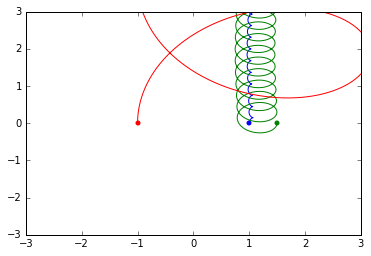

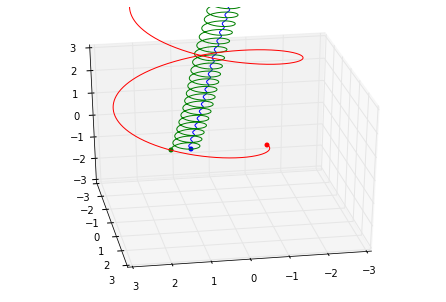

In [156]:
# Graficar en 3D
fig2d = plt.figure()
fig3d = plt.figure()

ax3d=Axes3D(fig3d)
ax2d=fig2d.gca()

for i in xrange(N):
    # Grafica en 3D
    line,=ax3d.plot(rs[i,:,0],rs[i,:,1],rs[i,:,2])
    color=line.get_color()
    ax3d.plot(rs[i,0:1,0],rs[i,0:1,1],rs[i,0:1,2],'o',color=color,markersize=5,markeredgecolor='none')
    
    # Grafica en 2D
    ax2d.plot(rs[i,:,0],rs[i,:,1],color=color)
    ax2d.plot(rs[i,0,0],rs[i,0,1],'o',color=color,markersize=5,markeredgecolor='none')
    
ax3d.view_init(elev=30,azim=80)

ext=3
ax3d.set_xlim(-ext,ext)
ax3d.set_ylim(-ext,ext)
ax3d.set_zlim(-ext,ext)
ax2d.set_xlim(-ext,ext)
ax2d.set_ylim(-ext,ext)

# Gráfica respecto al sistema de referencia de una partícula

(-2, 2)

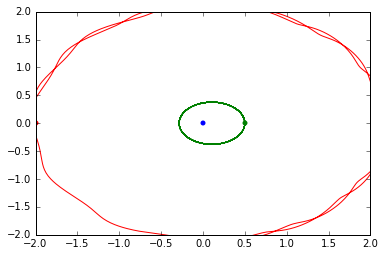

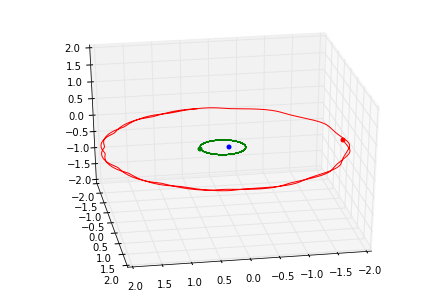

In [157]:
# Graficar en 3D
fig2d = plt.figure()
fig3d = plt.figure()

ax3d=Axes3D(fig3d)
ax2d=fig2d.gca()

ref=rs[0,:]
#Centro de Masa
#ref=R
for i in xrange(N):
    
    r=rs[i,:]-ref
    
    # Grafica en 3D
    line,=ax3d.plot(r[:,0],r[:,1],r[:,2])
    color=line.get_color()
    ax3d.plot(r[0:1,0],r[0:1,1],r[0:1,2],'o',color=color,markersize=5,markeredgecolor='none')
    
    # Grafica en 2D
    ax2d.plot(r[:,0],r[:,1],color=color)
    ax2d.plot(r[0,0],r[0,1],'o',color=color,markersize=5,markeredgecolor='none')
    
ax3d.view_init(elev=30,azim=80)

ext=2
ax3d.set_xlim(-ext,ext)
ax3d.set_ylim(-ext,ext)
ax3d.set_zlim(-ext,ext)
ax2d.set_xlim(-ext,ext)
ax2d.set_ylim(-ext,ext)